In [38]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [51]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
data_1_path = os.path.join(os.path.dirname(os.getcwd()),"data","cyber_security_data_1.csv")
data_2_path = os.path.join(os.path.dirname(os.getcwd()),"data","cyber_security_data_2.csv")

In [40]:
data1 = pd.read_csv(data_1_path)
data2 = pd.read_csv(data_2_path)

In [41]:
data1.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,30-05-2023 06:33,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,26-08-2020 07:08,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,13-11-2022 08:23,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,02-07-2023 10:38,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,16-07-2023 13:11,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


### Data Analysis and Preprocessing Level-1

In [42]:
data1.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')

In [43]:
data1.shape

(40000, 25)

In [44]:
data1.isna().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

* There are missing values in the dataset which need to be handled.

In [45]:
data1[data1.duplicated()]

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source


* There are no duplicated data.

* Our target column is "Attack Type".

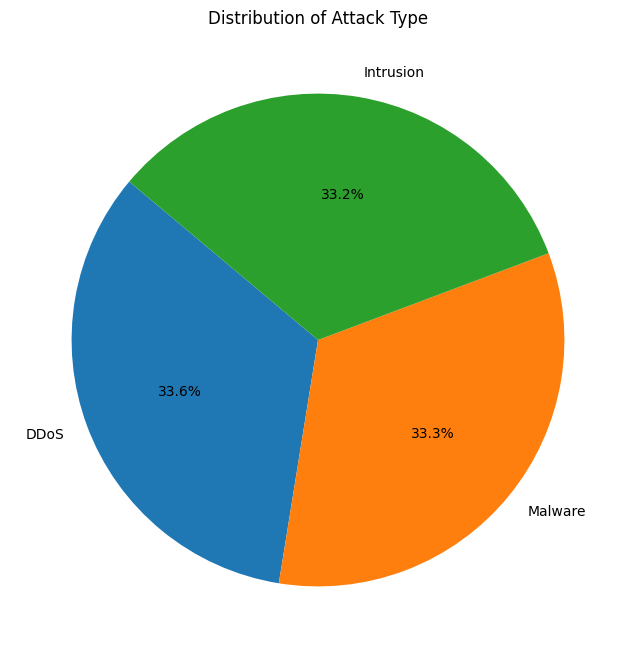

In [46]:
category_counts = data1['Attack Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Attack Type')
plt.show()

* From above graph it is clear that the data is nicely balanced with respect to target colunm. 

* We will drop "Timestamp" column as it won't be useful in analysis and developing efficient model.

In [47]:
data1.drop(columns=["Timestamp"],inplace=True)

### Data Analysis and Preprocessing Level-2

#### Univarite Data Analysis

##### Column: Log Source

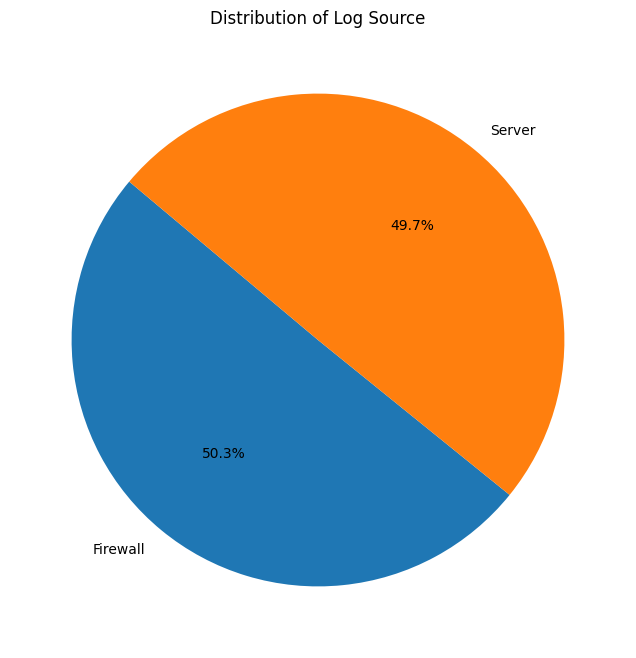

In [48]:
category_counts = data1['Log Source'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Log Source')
plt.show()

##### Firewall:
* A firewall monitors and controls incoming and outgoing network traffic based on predetermined security rules. It acts as a barrier between a trusted internal network and untrusted external networks, such as the internet, blocking or allowing traffic based on security policies. Firewall logs often capture information about blocked or allowed connections, traffic anomalies, and potential intrusions, making them essential in cybersecurity.

##### Server:
* A server is a centralized system that provides data, resources, and services to clients over a network. Server logs record various types of activity, including user login attempts, application errors, service requests, and system performance. These logs are valuable for identifying unusual patterns, such as unauthorized access or irregular data requests, which may signal a potential security threat.

"Log Source" feature contain binary data that can be seen from above graph we encode this column using One-Hot Encoding as there is no ordinal realtion between values of this features.

In [54]:
log_source_feature_encoder = OneHotEncoder(sparse=True)
log_source_feature_encoded = log_source_feature_encoder.fit_transform(data1[['Log Source']])
log_source_feature_encoded_df = pd.DataFrame.sparse.from_spmatrix(
    log_source_feature_encoded,
    columns=log_source_feature_encoder.get_feature_names_out(['Log Source'])
)

data1 = pd.concat([data1.drop(columns=['Log Source']), log_source_feature_encoded_df], axis=1)

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'